# K-means Clustering

### Import resources and display image

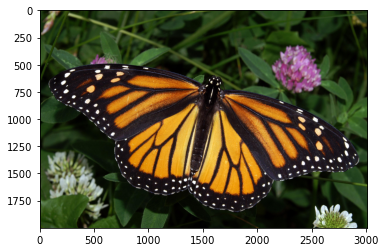

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Read in the image
## TODO: Check out the images directory to see other images you can work with
# And select one!
image = cv2.imread('images/monarch.jpg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

### Prepare data for k-means

In [10]:
# Reshape image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))

# Convert to float type
pixel_vals = np.float32(pixel_vals)


### Implement k-means clustering

In [11]:
# cv2.kmeans(samples, K, criteria, attempts, flags)
# 1. samples : It should be of np.float32 data type, and each feature should be put in a single column.
# 2. nclusters(K) : Number of clusters required at end
# 3. criteria : It is the iteration termination criteria. When this criteria is satisfied, algorithm iteration stops. Actually, it should be a tuple of 3 parameters. They are `( type, max_iter, epsilon )`:
#   a. type of termination criteria. It has 3 flags as below:
#     a1. cv.TERM_CRITERIA_EPS - stop the algorithm iteration if specified accuracy, epsilon, is reached.
#     a2. cv.TERM_CRITERIA_MAX_ITER - stop the algorithm after the specified number of iterations, max_iter.
#     a3. cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER - stop the iteration when any of the above condition is met.
#   b. max_iter - An integer specifying maximum number of iterations.
#   c. epsilon - Required accuracy
# 4. attempts : Flag to specify the number of times the algorithm is executed using different initial labellings. The algorithm returns the labels that yield the best compactness. This compactness is returned as output.
# 5. flags : This flag is used to specify how initial centers are taken. Normally two flags are used for this : cv.KMEANS_PP_CENTERS and cv.KMEANS_RANDOM_CENTERS.

In [32]:
# define stopping criteria
# you can change the number of max iterations for faster convergence!
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.1)

## TODO: Select a value for k (It takes longer time to run with the bigger k value)
# then perform k-means clustering
k = 3
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
# print("label = ",labels.flatten())


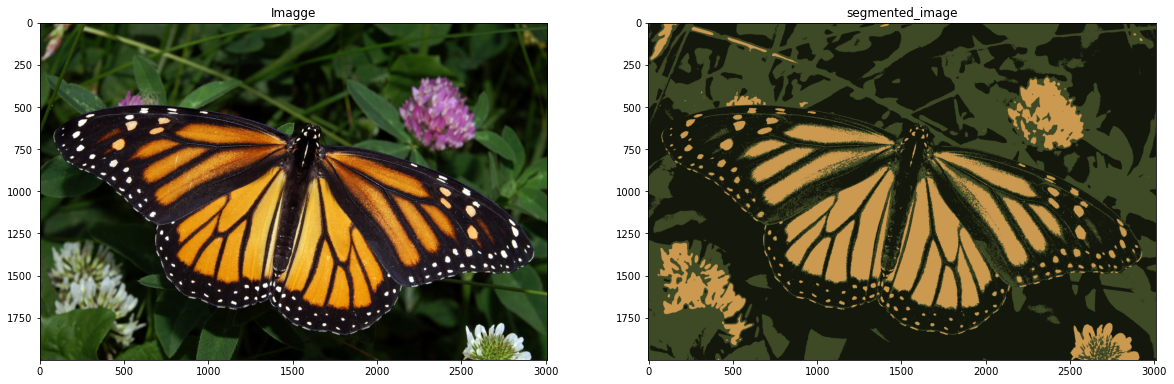

In [33]:
# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
labels_reshape = labels.reshape(image.shape[0], image.shape[1])

#imshow(segmented_image)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Imagge')
ax1.imshow(image)

ax2.set_title('segmented_image')
ax2.imshow(segmented_image)

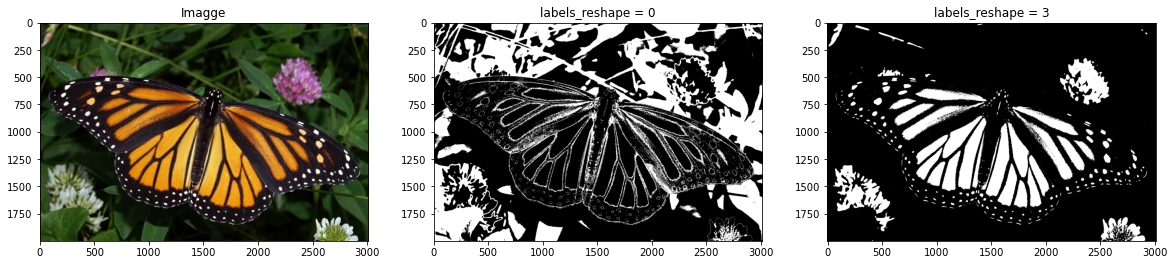

In [40]:
## TODO: Visualize one segment, try to find which is the leaves, background, etc!
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('Imagge')
ax1.imshow(image)

ax2.set_title('labels_reshape = 0')
ax2.imshow(labels_reshape==1, cmap='gray')

ax3.set_title('labels_reshape = 3')
ax3.imshow(labels_reshape==2, cmap='gray')

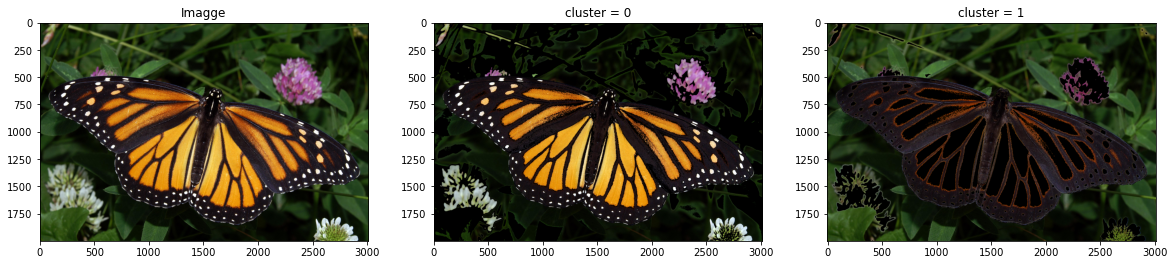

In [41]:
# mask an image segment by cluster
masked_image_0 = np.copy(image)
masked_image_1 = np.copy(image)

cluster = 1 # the first cluster
masked_image_0[labels_reshape == cluster] = [0, 0, 0] 

cluster = 2 # the 2nd cluster
masked_image_1[labels_reshape == cluster] = [0, 0, 0] 

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('Imagge')
ax1.imshow(image)

ax2.set_title('cluster = 0')
ax2.imshow(masked_image_0)

ax3.set_title('cluster = 1')
ax3.imshow(masked_image_1)